#Table of Contents
* [1. Web Scraping](#1.-Web-Scraping)
* [2. Filbert checking data](#2.-Filbert-checking-data)
* [3. Filbert: run from here onwards](#3.-Filbert:-run-from-here-onwards)

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random

In [2]:
from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests

#2. Filbert checking data

In [3]:
citiesraw = []
citiesfile = open('tempdata/worldcitiespop.txt', 'r')
citiesfile.readline()
while 1:
    line = citiesfile.readline()
    if not line:
        break
    citiesraw.append(line)

In [48]:
import codecs
cities2raw = []
with codecs.open('tempdata/CountriesToCities.json', 'r', encoding= "UTF-16") as f:
    for line in f:
       cities2raw.append(json.loads(line))

In [13]:
cities2 = cities2raw[0].values()
citiesflatten = [item.lower() for sublist in cities2 for item in sublist]

In [15]:
print len(citiesraw)
print len(citiesflatten)

3173958
86112


In [49]:
countries = [item.lower() for item in cities2raw[0].keys()]

In [22]:
#This is a lilst of both countries and cities
cities_countries = citiesflatten+countries
print len(cities_countries)

86360


In [30]:
unique_citiescountries = list(set(cities_countries))
print len(unique_citiescountries)

73768


In [31]:
#We remove all repeating entries, as we will not be able to know the coordinates for those places
import collections
noduplicatescities = [item for item, count in collections.Counter(cities_countries).items() if count == 1]
print len(noduplicatescities)

67872


In [53]:
#lastly, we remove countries from the noduplicate list. we only want cities
noduplicatescities2 = [x for x in noduplicatescities if x not in countries]
print len(countries)
print len(noduplicatescities2)

248
67684


In [37]:
print citiesraw[:10]
print citiesraw[0].split(',')

['ad,aixas,Aix\xe0s,06,,42.4833333,1.4666667\n', 'ad,aixirivali,Aixirivali,06,,42.4666667,1.5\n', 'ad,aixirivall,Aixirivall,06,,42.4666667,1.5\n', 'ad,aixirvall,Aixirvall,06,,42.4666667,1.5\n', 'ad,aixovall,Aixovall,06,,42.4666667,1.4833333\n', 'ad,andorra,Andorra,07,,42.5,1.5166667\n', 'ad,andorra la vella,Andorra la Vella,07,20430,42.5,1.5166667\n', 'ad,andorra-vieille,Andorra-Vieille,07,,42.5,1.5166667\n', 'ad,andorre,Andorre,07,,42.5,1.5166667\n', 'ad,andorre-la-vieille,Andorre-la-Vieille,07,,42.5,1.5166667\n']
['ad', 'aixas', 'Aix\xe0s', '06', '', '42.4833333', '1.4666667\n']


In [ ]:
---------------------------

In [80]:
#WARNING: THIS TAKES A REALLY LONG TIME
cities_large = {}
duplicatecities_large = []
for x in range(len(citiesraw)):
    cityname = citiesraw[x][:-1].split(',')[1]
    if cityname not in cities_large:
        if cityname not in duplicatecities_large:
            cities_large[citiesraw[x][:-1].split(',')[1]] = [citiesraw[x][:-1].split(',')[5], citiesraw[x][:-1].split(',')[6]]
    else:
        duplicatecities_large.append(cityname)
        del cities_large[cityname]
    if x%100000 == 0:
        print x

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000


In [81]:
print len(duplicatecities_large)
print len(cities_large)


313703
2038189


In [86]:
#save to file
w = csv.writer(open("unique_cities_large.csv", "w"))
for key, val in cities_large.items():
    w.writerow([key, val])

In [87]:
#Write to file
cities_large_test = {}
for key, val in csv.reader(open("unique_cities_large.csv")):
    cities_large_test[key] = val

In [91]:
-------------------------

['granja san jacinto', 'rogataya balkano', 'santawang', 'olmsville', 'cheshmeh bideh', 'talontan', 'golujeh-ye sofla', 'jingpaishang', 'point e', 'soestdijk']


In [113]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode('minsk')
print location.latitude, location.longitude

53.902334 27.5618791


In [ ]:
------------------------

In [92]:
df = pd.read_json("tempdata/movieinfo_2014_full.json")
df = df.append(pd.read_json("tempdata/movieinfo_2013.json"))
df = df.append(pd.read_json("tempdata/movieinfo_2012.json"))
df = df.append(pd.read_json("tempdata/movieinfo_2011.json"))
df = df.append(pd.read_json("tempdata/movieinfo_2010.json"))
df = df.append(pd.read_json("tempdata/movieinfo_2009.json"))

In [93]:
r_df = df[~df["user_ratings"].isnull()].reset_index()

In [94]:
len(r_df)

32788

In [95]:
new_df = r_df[r_df["location_page"]!="None"].reset_index()
new_df

,level_0,index,budget,contentRating,country,critic_ratings,duration,genre,gross,language,location_page,name,opening_weekend,release_dates,url,user_ratings,user_ratings_count,year
0,0,0,"€1,500,000",NaN,Kazakhstan,NaN,110 min,[Drama],NaN,Russian,"[Minsk, Belarus , Almaty, Kazakhstan , St. Pet...",Ya ne vernus,NaN,[ 1 March 2014 (Russia) ],/title/tt2637844/,6.9,320,2014
1,2,3,NaN,NaN,USA,NaN,85 min,"[Horror, Mystery, Thriller]",NaN,English,"[Silt, Colorado, USA ]",Find Me,NaN,[ 1 September 2014 (USA) ],/title/tt3027188/,4.5,649,2014
2,3,4,NaN,NaN,Ireland,NaN,88 min,"[Comedy, Drama, Family]",NaN,English,"[Dublin, County Dublin, Ireland , County Wickl...",Gold,NaN,[ 10 October 2014 (Ireland) ],/title/tt3134422/,6.1,406,2014
3,7,10,NaN,Not,USA,NaN,85 min,"[Action, Sci-Fi, Thriller]",NaN,English,"[Los Angeles, California, USA , Long Beach, Ca...",Mega Shark vs. Mecha Shark,NaN,[ 28 January 2014 (USA) ],/title/tt3152098/,2.6,"1,988",2014
4,8,11,NaN,NaN,Poland,NaN,117 min,"[Drama, Romance]",NaN,Polish,"[Ancona, Marche, Italy , Warsaw, Mazowieckie, ...",Obce cialo,NaN,[ 5 December 2014 (Poland) ],/title/tt3997248/,4.6,156,2014
5,12,19,"$50,000",NaN,USA,NaN,NaN,[Comedy],NaN,English,"[Angelus Oaks, California, USA , California, U...",Camp-Off,NaN,[ 4 April 2014 (USA) ],/title/tt3482042/,7.3,7,2014
6,14,21,NaN,NaN,Germany,NaN,84 min,"[Comedy, Drama]",NaN,German,"[Akademie der Künste, Berlin, Germany , Haus d...",Ich will mich nicht künstlich aufregen,NaN,[ February 2014 (Germany) ],/title/tt3471498/,6.2,28,2014
7,15,23,NaN,NaN,Sweden,NaN,99 min,"[Action, Crime, Drama]",NaN,Swedish,"[Falkenberg, Hallands län, Sweden , Uddevalla,...",Svart kung,NaN,[ 15 March 2014 (Sweden) ],/title/tt2935416/,6.2,42,2014
8,16,24,"$7,100",NaN,USA,NaN,92 min,[Action],NaN,English,"[New York, USA , Paulsboro, New Jersey, USA , ...",Battle,NaN,[ 25 December 2014 (USA) ],/title/tt2094769/,6.6,8,2014
9,20,29,NaN,NaN,UK,NaN,90 min,[Horror],NaN,English,"[Wales, UK ]",Valley of the Witch,NaN,[ 13 January 2015 (USA) ],/title/tt2908340/,5.0,67,2014


In [96]:
len(new_df)

18031

In [97]:
places = set()
places_freq = {}
separated_places = []
for row in new_df["location_page"]:
    temp = []
    for loc in row:
        split = loc.split(",")
        for item in split:
            stripped = item.encode('utf8').strip().lower()
            if stripped!="":
                places.add(stripped)
                temp.append(stripped)
                if stripped not in places_freq.keys():
                    places_freq[stripped] = 1
                places_freq[stripped] = places_freq[stripped] + 1
    separated_places.append(temp)
df_boolean = new_df.copy()
df_boolean['separated_places'] = separated_places

In [98]:
len(places)

18983

In [100]:
places_freq = []
separated_places = []
for row in new_df["location_page"]:
    temp = []
    for loc in row:
        split = loc.split(",")
        for item in split:
            stripped = item.encode('utf8').strip().lower()
            if stripped!="":
                places.add(stripped)
                temp.append(stripped)
    separated_places.append(temp)
df_boolean = new_df.copy()
df_boolean['separated_places'] = separated_places

In [101]:
genreset = set()

for index, row in new_df.iterrows():
    genreslist = row.genre
    for genre in genreslist:
        genreset.add(genre.encode('utf8'))

In [102]:
print len(genreset)
genreset

24


{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Data Cleaning part

In [108]:
for entry in df_boolean['separated_places']:
    print entry
    print [x for x in entry if x in citiesflatten]
    print 

['minsk', 'belarus', 'almaty', 'kazakhstan', 'st. petersburg', 'russia']
['minsk', 'almaty', 'russia']

['silt', 'colorado', 'usa']
['silt', 'colorado', 'usa']

['dublin', 'county dublin', 'ireland', 'county wicklow', 'ireland']
['dublin', 'ireland', 'ireland']

['los angeles', 'california', 'usa', 'long beach', 'california', 'usa']
['los angeles', 'california', 'usa', 'long beach', 'california', 'usa']

['ancona', 'marche', 'italy', 'warsaw', 'mazowieckie', 'poland', 'moscow', 'russia']
['ancona', 'marche', 'italy', 'warsaw', 'poland', 'moscow', 'russia']

['angelus oaks', 'california', 'usa', 'california', 'usa', 'usa']
['california', 'usa', 'california', 'usa', 'usa']

['akademie der k\xc3\xbcnste', 'berlin', 'germany', 'haus der kulturen der welt', 'berlin', 'germany']
['berlin', 'berlin']

['falkenberg', 'hallands l\xc3\xa4n', 'sweden', 'uddevalla', 'v\xc3\xa4stra g\xc3\xb6talands l\xc3\xa4n', 'sweden', 'gothenburg', 'v\xc3\xa4stra g\xc3\xb6talands l\xc3\xa4n', 'sweden', 'halmstad

C:\Users\Zhi Qian\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


KeyboardInterrupt: 

In [52]:
df_boolean[:10]

,level_0,index,budget,contentRating,country,critic_ratings,duration,genre,gross,language,location_page,name,opening_weekend,release_dates,url,user_ratings,user_ratings_count,year,separated_places
0,0,0,"€1,500,000",NaN,Kazakhstan,NaN,110 min,[Drama],NaN,Russian,"[Minsk, Belarus , Almaty, Kazakhstan , St. Pet...",Ya ne vernus,NaN,[ 1 March 2014 (Russia) ],/title/tt2637844/,6.9,320,2014,"[minsk, belarus, almaty, kazakhstan, st. peter..."
1,2,3,NaN,NaN,USA,NaN,85 min,"[Horror, Mystery, Thriller]",NaN,English,"[Silt, Colorado, USA ]",Find Me,NaN,[ 1 September 2014 (USA) ],/title/tt3027188/,4.5,649,2014,"[silt, colorado, usa]"
2,3,4,NaN,NaN,Ireland,NaN,88 min,"[Comedy, Drama, Family]",NaN,English,"[Dublin, County Dublin, Ireland , County Wickl...",Gold,NaN,[ 10 October 2014 (Ireland) ],/title/tt3134422/,6.1,406,2014,"[dublin, county dublin, ireland, county wicklo..."
3,7,10,NaN,Not,USA,NaN,85 min,"[Action, Sci-Fi, Thriller]",NaN,English,"[Los Angeles, California, USA , Long Beach, Ca...",Mega Shark vs. Mecha Shark,NaN,[ 28 January 2014 (USA) ],/title/tt3152098/,2.6,"1,988",2014,"[los angeles, california, usa, long beach, cal..."
4,8,11,NaN,NaN,Poland,NaN,117 min,"[Drama, Romance]",NaN,Polish,"[Ancona, Marche, Italy , Warsaw, Mazowieckie, ...",Obce cialo,NaN,[ 5 December 2014 (Poland) ],/title/tt3997248/,4.6,156,2014,"[ancona, marche, italy, warsaw, mazowieckie, p..."
5,12,19,"$50,000",NaN,USA,NaN,NaN,[Comedy],NaN,English,"[Angelus Oaks, California, USA , California, U...",Camp-Off,NaN,[ 4 April 2014 (USA) ],/title/tt3482042/,7.3,7,2014,"[angelus oaks, california, usa, california, us..."
6,14,21,NaN,NaN,Germany,NaN,84 min,"[Comedy, Drama]",NaN,German,"[Akademie der Künste, Berlin, Germany , Haus d...",Ich will mich nicht künstlich aufregen,NaN,[ February 2014 (Germany) ],/title/tt3471498/,6.2,28,2014,"[akademie der künste, berlin, germany, haus de..."
7,15,23,NaN,NaN,Sweden,NaN,99 min,"[Action, Crime, Drama]",NaN,Swedish,"[Falkenberg, Hallands län, Sweden , Uddevalla,...",Svart kung,NaN,[ 15 March 2014 (Sweden) ],/title/tt2935416/,6.2,42,2014,"[falkenberg, hallands län, sweden, uddevalla, ..."
8,16,24,"$7,100",NaN,USA,NaN,92 min,[Action],NaN,English,"[New York, USA , Paulsboro, New Jersey, USA , ...",Battle,NaN,[ 25 December 2014 (USA) ],/title/tt2094769/,6.6,8,2014,"[new york, usa, paulsboro, new jersey, usa, ph..."
9,20,29,NaN,NaN,UK,NaN,90 min,[Horror],NaN,English,"[Wales, UK ]",Valley of the Witch,NaN,[ 13 January 2015 (USA) ],/title/tt2908340/,5.0,67,2014,"[wales, uk]"


In [124]:
print len(citiesflatten)
cityflattenset = set(citiesflatten)

86112
73580


In [119]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode(city)
print ((location.latitude, location.longitude))

(45.7764579, -71.932137)


In [130]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
cityflattenset = set(citiesflatten)
counter = 0
city_coordinates = {}
start = time.time()
for city in cityflattenset:

    location = geolocator.geocode(city)
    if location is not None: 
        city_coordinates[city] =(location.latitude, location.longitude)
        #print str(counter) + "   " + str(city) + "   " + str(location.latitude) + "   " + str(location.longitude)

        if counter%100  == 0:
            print time.time() - start
            break
    counter = counter + 1

41.8109998703


In [127]:
print city_coordinates

{u'vassenden': (60.6455894, 5.9974307), u'champs-sur-yonne': (47.739362, 3.6014046), u'gendorf': (51.0719603, 6.1836666), u'scheuring': (48.1703392, 10.8959488), u'luanco': (43.6135047, -5.7938812), u'artajo': (42.7293478, -1.3402784), u'tilton': (43.4422993, -71.5889641), u'woods': (36.7915843, -98.8313546), u'urcuit': (43.4856054, -1.3367618), u'lentfohrden': (53.8739859, 9.8862602), u'chalonnes-sur-loire': (47.3516207, -0.76311), u'laranjal paulista': (-23.0514645, -47.8361814277027), u'minhang': (31.0817874, 121.4246978), u'riachao do jacuipe': (-11.806681, -39.381812), u'deep run': (40.4152163, -75.1706557), u'le theil-de-bretagne': (47.9204169, -1.4293785), u'casa nova': (-9.1736775, -40.9734475), u'yangan': (-28.1957832, 152.2110952), u'winterrieden': (48.120121, 10.2258052), u'iguai': (-14.752754, -40.089417), u'bocka': (50.8192533, 11.9668722), u'chanthaburi': (12.77282385, 102.175882524412), u'east bergholt': (51.9784172, 1.0179463), u'therouanne': (50.6363338, 2.2577192), u'

In [115]:


separated_cities = []
coordinates = []
for x in range(len(df_boolean)):
    temp = df_boolean['separated_places'][x]
    templist = []
    coordinatestemp = []
    for y in range(len(temp)):
        if temp[y] in citiesflatten:
            templist.append(temp[y])   

    #print templist
    #print temp
    #print
    separated_cities.append(templist)
    coordinates.append(coordinatestemp)
    if (x%100) == 0:
        print x
    
df_boolean["separated_cities"] = separated_cities
df_boolean["coordinates"] = coordinates

minsk   53.902334   27.5618791
almaty   43.21984255   76.9183518875
russia   64.6863136   97.7453061
0
silt   34.9996976   -117.7495072
colorado   38.7251776   -105.6077167
usa   39.7837304   -100.4458825
dublin   53.3497645   -6.2602732
ireland   52.865196   -7.9794599
ireland   52.865196   -7.9794599
los angeles   34.053717   -118.2427265
california   36.7014631   -118.7559974
usa   39.7837304   -100.4458825
long beach   33.7774658   -118.1884871
california   36.7014631   -118.7559974
usa   39.7837304   -100.4458825
ancona   43.6170137   13.5170982
marche   43.3458388   13.1415872
italy   42.6384261   12.674297
warsaw   52.2319237   21.0067265
poland   52.0977181   19.0258159
moscow   55.7516335   37.6187042
russia   64.6863136   97.7453061
california   36.7014631   -118.7559974
usa   39.7837304   -100.4458825
california   36.7014631   -118.7559974
usa   39.7837304   -100.4458825
usa   39.7837304   -100.4458825
berlin   52.5170365   13.3888599
berlin   52.5170365   13.3888599
falkenb

C:\Users\Zhi Qian\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


KeyboardInterrupt: 

In [ ]:
import codecs
cities2raw = []
with codecs.open('tempdata/CountriesToCities.json', 'r', encoding= "UTF-16") as f:
    for line in f:
       cities2raw.append(json.loads(line))

In [178]:
#print cities2raw

In [91]:
cities2 = cities2raw[0].values()

In [99]:
citiesflatten = [item.lower() for sublist in cities2 for item in sublist]

In [100]:
print len(citiesflatten)

86112


In [124]:
test = "Egypt"
for key in cities2raw[0]:
    if test in cities2raw[0][key]:
        print key

United States


In [140]:
df_boolean.head(10)

,level_0,index,budget,contentRating,country,critic_ratings,duration,genre,gross,language,location_page,name,opening_weekend,release_dates,url,user_ratings,user_ratings_count,year,separated_places,separated_cities
0,0,0,"€1,500,000",NaN,Kazakhstan,NaN,110 min,[Drama],NaN,Russian,"[Minsk, Belarus , Almaty, Kazakhstan , St. Pet...",Ya ne vernus,NaN,[ 1 March 2014 (Russia) ],/title/tt2637844/,6.9,320,2014,"[minsk, belarus, almaty, kazakhstan, st. peter...","[minsk, almaty, russia]"
1,2,3,NaN,NaN,USA,NaN,85 min,"[Horror, Mystery, Thriller]",NaN,English,"[Silt, Colorado, USA ]",Find Me,NaN,[ 1 September 2014 (USA) ],/title/tt3027188/,4.5,649,2014,"[silt, colorado, usa]","[silt, colorado, usa]"
2,3,4,NaN,NaN,Ireland,NaN,88 min,"[Comedy, Drama, Family]",NaN,English,"[Dublin, County Dublin, Ireland , County Wickl...",Gold,NaN,[ 10 October 2014 (Ireland) ],/title/tt3134422/,6.1,406,2014,"[dublin, county dublin, ireland, county wicklo...","[dublin, ireland, ireland]"
3,7,10,NaN,Not,USA,NaN,85 min,"[Action, Sci-Fi, Thriller]",NaN,English,"[Los Angeles, California, USA , Long Beach, Ca...",Mega Shark vs. Mecha Shark,NaN,[ 28 January 2014 (USA) ],/title/tt3152098/,2.6,"1,988",2014,"[los angeles, california, usa, long beach, cal...","[los angeles, california, usa, long beach, cal..."
4,8,11,NaN,NaN,Poland,NaN,117 min,"[Drama, Romance]",NaN,Polish,"[Ancona, Marche, Italy , Warsaw, Mazowieckie, ...",Obce cialo,NaN,[ 5 December 2014 (Poland) ],/title/tt3997248/,4.6,156,2014,"[ancona, marche, italy, warsaw, mazowieckie, p...","[ancona, marche, italy, warsaw, poland, moscow..."
5,12,19,"$50,000",NaN,USA,NaN,NaN,[Comedy],NaN,English,"[Angelus Oaks, California, USA , California, U...",Camp-Off,NaN,[ 4 April 2014 (USA) ],/title/tt3482042/,7.3,7,2014,"[angelus oaks, california, usa, california, us...","[california, usa, california, usa, usa]"
6,14,21,NaN,NaN,Germany,NaN,84 min,"[Comedy, Drama]",NaN,German,"[Akademie der Künste, Berlin, Germany , Haus d...",Ich will mich nicht künstlich aufregen,NaN,[ February 2014 (Germany) ],/title/tt3471498/,6.2,28,2014,"[akademie der künste, berlin, germany, haus de...","[berlin, berlin]"
7,15,23,NaN,NaN,Sweden,NaN,99 min,"[Action, Crime, Drama]",NaN,Swedish,"[Falkenberg, Hallands län, Sweden , Uddevalla,...",Svart kung,NaN,[ 15 March 2014 (Sweden) ],/title/tt2935416/,6.2,42,2014,"[falkenberg, hallands län, sweden, uddevalla, ...","[falkenberg, uddevalla, gothenburg, halmstad]"
8,16,24,"$7,100",NaN,USA,NaN,92 min,[Action],NaN,English,"[New York, USA , Paulsboro, New Jersey, USA , ...",Battle,NaN,[ 25 December 2014 (USA) ],/title/tt2094769/,6.6,8,2014,"[new york, usa, paulsboro, new jersey, usa, ph...","[new york, usa, paulsboro, usa, philadelphia, ..."
9,20,29,NaN,NaN,UK,NaN,90 min,[Horror],NaN,English,"[Wales, UK ]",Valley of the Witch,NaN,[ 13 January 2015 (USA) ],/title/tt2908340/,5.0,67,2014,"[wales, uk]",[wales]


In [144]:
df_boolean.to_csv('df_boolean_temp.csv',sep=',',encoding='utf-8')

In [173]:
places3 = set()
places3_freq = {}
for row in df_boolean["separated_cities"]:
    for loc in row:
        places3.add(loc)
        #split = loc.split(",")
        #for item in split:
        #    stripped = item.encode('utf8').strip().lower()
        #    if stripped!="":
        if stripped not in places3_freq.keys():
            places3_freq[stripped] = 1
        places3_freq[stripped] = places3_freq[stripped] + 1
print len(places3)

6536


In [145]:
for place in places2:
        df_boolean[place] = [place in location for location in df_boolean.separated_cities]

#3. Filbert: run from here onwards

In [3]:
new_df_input = pd.read_csv('df_boolean_temp2.csv',sep=',',encoding='utf-8')

In [4]:
new_df_input.drop('level_0', axis=1, inplace=True)
new_df_input.drop('Unnamed: 0', axis=1, inplace=True)
new_df_input.head()

,index,budget,contentRating,country,critic_ratings,duration,genre,gross,language,location_page,name,opening_weekend,release_dates,url,user_ratings,user_ratings_count,year,separated_places,separated_cities
0,0,"€1,500,000",NaN,Kazakhstan,NaN,110 min,[Drama],NaN,Russian,"[Minsk, Belarus , Almaty, Kazakhstan , St. Pet...",Ya ne vernus,NaN,[ 1 March 2014 (Russia) ],/title/tt2637844/,6.9,320,2014,"[minsk, belarus, almaty, kazakhstan, st. peter...","[minsk, belarus, almaty, kazakhstan, russia]"
1,3,NaN,NaN,USA,NaN,85 min,"[Horror, Mystery, Thriller]",NaN,English,"[Silt, Colorado, USA ]",Find Me,NaN,[ 1 September 2014 (USA) ],/title/tt3027188/,4.5,649,2014,"[silt, colorado, usa]","[silt, colorado, usa]"
2,4,NaN,NaN,Ireland,NaN,88 min,"[Comedy, Drama, Family]",NaN,English,"[Dublin, County Dublin, Ireland , County Wickl...",Gold,NaN,[ 10 October 2014 (Ireland) ],/title/tt3134422/,6.1,406,2014,"[dublin, county dublin, ireland, county wicklo...","[dublin, ireland, ireland]"
3,10,NaN,Not,USA,NaN,85 min,"[Action, Sci-Fi, Thriller]",NaN,English,"[Los Angeles, California, USA , Long Beach, Ca...",Mega Shark vs. Mecha Shark,NaN,[ 28 January 2014 (USA) ],/title/tt3152098/,2.6,"1,988",2014,"[los angeles, california, usa, long beach, cal...","[los angeles, california, usa, long beach, cal..."
4,11,NaN,NaN,Poland,NaN,117 min,"[Drama, Romance]",NaN,Polish,"[Ancona, Marche, Italy , Warsaw, Mazowieckie, ...",Obce cialo,NaN,[ 5 December 2014 (Poland) ],/title/tt3997248/,4.6,156,2014,"[ancona, marche, italy, warsaw, mazowieckie, p...","[ancona, marche, italy, warsaw, poland, moscow..."


In [5]:
#Get set of unique cities

def unique_entries(input_df, field):
    entries = set()
    for row in input_df[field]:
        for loc in row:
            entries.add(loc)
    return entries

#clean the column by removing brackets from the reads
def clean_column(input_df, field):
    cleanedrowlist = []
    for row in input_df[field]:
        cleanedrow =  row.replace('[', '')
        cleanedrow =  cleanedrow.replace(']', '')
        cleanedrow = cleanedrow.split(", ")
        cleanedrowlist.append(cleanedrow)
    input_df[field] = cleanedrowlist

In [6]:
newdf_boolean = new_df_input.copy()
clean_column(newdf_boolean, "separated_cities")
clean_column(newdf_boolean, "genre")

In [7]:
places2 = unique_entries(newdf_boolean, "separated_cities")
places2.remove("")
places2.remove("...")
print len(places2) 

6664


In [8]:
genres = unique_entries(newdf_boolean, "genre")
genres.remove("")
print len(genres) 
print genres

24
set([u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Reality-TV', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Musical', u'History', u'Family', u'Fantasy', u'Game-Show', u'Sport', u'Biography'])


In [9]:
PCAdf = pd.DataFrame()
#create a column for each city, and set to true if that row contains that city
for place in places2:
        PCAdf[place] = [place in location for location in newdf_boolean.separated_cities]
for genre in genres:
        PCAdf[genre] = [genre in genre_entries for genre_entries in newdf_boolean.genre]

In [10]:
PCAdf = PCAdf.astype(int)
PCAdf

,collegeville,tilton,saylorsburg,uithoorn,roslyn,cyprus,zittau,colorno,hermann,saipan,kannapolis,puente de ixtla,bratislava,roissy-en-france,avondale,kottayam,sichuan,forest hills,helsingborg,sturgis,vologda,coventry,new iberia,rancho mirage,juan-les-pins,bad zurzach,inkster,chiasso,sankt peter-ording,sanderson,currie,soave,portugalete,bernalillo,inglewood,paphos,port mcneill,creully,san valentino torio,west dundee,china,torre del greco,niagara falls,manvel,gonars,sneek,brownsville,golden,hornsby,inyokern,...,evesham,luling,tremonton,finglas,orono,breaza,american falls,boom,tredegar,algeciras,chioggia,chaves,wieliszew,kinde,harefield,vence,richardson,tarrytown,brechin,makati city,portneuf,gorham,heathcote,abergele,heide,creuzburg,Sci-Fi,Crime,Romance,Animation,Music,Adult,Comedy,War,Horror,Western,News,Reality-TV,Thriller,Adventure,Mystery,Drama,Action,Musical,History,Family,Fantasy,Game-Show,Sport,Biography
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#random sample of 6000 rows
random.seed(10)

SAMPLESIZE = 10000

newdf_boolean_sampled = new_df_input.copy()
clean_column(newdf_boolean_sampled, "separated_cities")
clean_column(newdf_boolean_sampled, "genre")

rows = random.sample(newdf_boolean_sampled.index, SAMPLESIZE)
newdf_boolean_sampled = newdf_boolean_sampled.ix[rows]

In [12]:
places3 = unique_entries(newdf_boolean_sampled, "separated_cities")
if "" in places3:
    places3.remove("")
if "..." in places3:
    places3.remove("...")
print len(places3) 

4802


In [13]:
genres3 = unique_entries(newdf_boolean_sampled, "genre")
genres3.remove("")
print len(genres3) 
print genres3

24
set([u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Reality-TV', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Musical', u'History', u'Family', u'Fantasy', u'Game-Show', u'Sport', u'Biography'])


In [14]:
PCAsampleddf = pd.DataFrame()
#create a column for each city, and set to true if that row contains that city
for place in places3:
        PCAsampleddf[place] = [place in location for location in newdf_boolean_sampled.separated_cities]
for genre in genres3:
        PCAsampleddf[genre] = [genre in genre_entries for genre_entries in newdf_boolean_sampled.genre]

In [15]:
PCAsampleddf = PCAsampleddf.astype(int)
PCAsampleddf

,trenton,bartoszyce,brindisi,bad grund,green river,ilulissat,chigasaki,collegeville,wilton manors,sichuan,nottingham,saylorsburg,uithoorn,brantford,roslyn,crete,kassel,tajikistan,zittau,san ignacio,sherman oaks,jaipur,paris,gig harbor,islip,potomac,colorno,geyserville,el campello,las palmas de gran canaria,pushkin,bagalkot,chennai,stanton,puente de ixtla,freudenstadt,wausau,aurora,bryn mawr,folsom,mary esther,bratislava,koprivnica,rapid city,truchas,georgia,jenkintown,roissy-en-france,cape may,yucaipa,...,deggendorf,kirkwood,harefield,warner springs,vence,whitby,heide,tarrytown,brechin,carcassonne,banff,montrose,baker,makati city,lloret de mar,charenton-le-pont,merthyr tydfil,scotch plains,oeiras,foster city,nuuk,abergele,westfield,bierset,arenys de mar,creuzburg,Sci-Fi,Crime,Romance,Animation,Music,Adult,Comedy,War,Horror,Western,News,Reality-TV,Thriller,Adventure,Mystery,Drama,Action,Musical,History,Family,Fantasy,Game-Show,Sport,Biography
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


usa            4460
california     1637
los angeles    1153
new york        742
england         657
canada          570
india           507
germany         460
france          433
london          380
italy           334
spain           293
paris           237
ontario         234
australia       198
dtype: int64


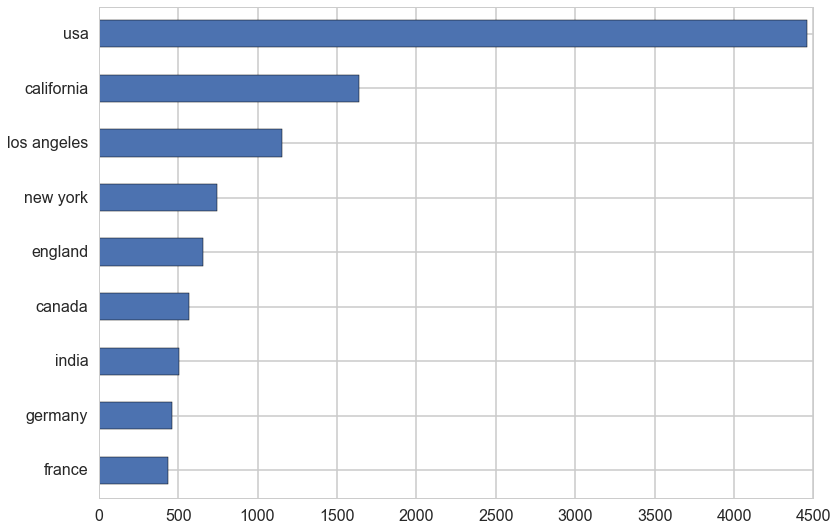

In [63]:
freq = PCAsampleddf[PCAsampleddf.columns[:-len(genres3)]].sum(axis=0)
sortfreq = freq.sort_values(ascending=False)
print sortfreq[0:15]
ax=(sortfreq[0:9]).plot('barh')
ax.invert_yaxis()

## Get Rating DF

In [16]:
def get_median(input_df):
    rating_list = []
    for x in input_df["user_ratings"]:
        if isinstance(x, (np.ndarray, np.generic) ):
            rating_list.append(x)

    print np.mean(rating_list)
    ratingmedian = np.median(rating_list)
    print ratingmedian
    return ratingmedian

In [17]:
def get_ratingdf(inputdf):
    ratingsdf = pd.DataFrame()
    #ratingmedian = get_median(inputdf)
    ratingmedian = 5
    ratingslist = []
    for x in range(len(inputdf)):
        if inputdf["user_ratings"].iloc[x] >= ratingmedian:
            ratingslist.append(1)
        else:
            ratingslist.append(0)
    ratingsdf["fresh"] = ratingslist
    return ratingsdf

In [18]:
ratingsdf = get_ratingdf(newdf_boolean)
ratingsdf_sampled = get_ratingdf(newdf_boolean_sampled)
#print ratingsdf_sampled.head()

# PCA on size 10,000 data set

In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1500)

#X should consist only of independent variables, leave out Y
new_X = pca.fit_transform(PCAsampleddf)

In [20]:
pca.explained_variance_ratio_

array([  8.86433267e-02,   6.39769350e-02,   5.61598880e-02, ...,
         4.57877008e-05,   4.57877008e-05,   4.57877008e-05])

In [21]:
print pca.explained_variance_ratio_.sum()

0.950989475389


In [22]:
Xdf = pd.DataFrame()

for i in range(pca.explained_variance_ratio_.shape[0]):
    Xdf["pc%i" % (i+1)] = new_X[:,i]

In [23]:
Xdf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,...,pc1451,pc1452,pc1453,pc1454,pc1455,pc1456,pc1457,pc1458,pc1459,pc1460,pc1461,pc1462,pc1463,pc1464,pc1465,pc1466,pc1467,pc1468,pc1469,pc1470,pc1471,pc1472,pc1473,pc1474,pc1475,pc1476,pc1477,pc1478,pc1479,pc1480,pc1481,pc1482,pc1483,pc1484,pc1485,pc1486,pc1487,pc1488,pc1489,pc1490,pc1491,pc1492,pc1493,pc1494,pc1495,pc1496,pc1497,pc1498,pc1499,pc1500
0,-0.066350,-0.670093,-0.050836,0.078633,-1.125600,-0.056040,-0.105434,0.190272,0.538619,-0.195652,-0.399023,-0.164460,-0.293033,-0.027973,0.122600,0.037682,0.003890,-0.031325,-0.011806,0.046461,-0.056476,-0.053256,0.008578,0.044745,-0.100227,0.071823,0.046617,0.066691,0.062903,0.000380,0.164204,-0.069500,-0.098806,0.166479,-0.150137,0.079788,-1.153106,-0.104587,-0.621643,-0.072449,0.047920,-0.040244,-0.065587,0.058357,0.000321,-0.000242,-0.021478,-0.027888,0.076853,0.009436,...,-0.000438,-0.002407,0.001025,0.002078,0.000568,-0.000128,0.000520,-0.002168,0.002026,-0.001497,-2.196777e-03,-0.001142,0.000665,0.000840,-0.000200,0.001133,0.001909,-0.000977,0.000437,-0.001389,-0.001871,-0.000345,0.001306,0.000659,0.001392,-0.001358,-0.000818,0.001093,-0.000189,0.000809,-0.000589,0.000197,-0.000129,0.000094,0.000048,-0.001028,-0.000985,-0.000508,0.000316,-0.000454,0.000286,-0.000285,-0.000136,5.545358e-15,-1.071335e-15,8.011229e-17,2.192823e-15,-2.000105e-15,3.678057e-15,4.806914e-17
1,-0.560812,0.531123,0.382659,0.333944,-0.439023,0.241006,-0.316783,0.065685,0.135553,-0.021532,-0.771417,-0.326313,-0.164382,-0.026190,0.103695,0.084151,-0.096116,0.168581,0.021410,-0.009517,-0.020731,0.033012,-0.034160,0.054860,-0.053168,0.011908,-0.023070,0.023686,-0.010562,0.020057,-0.055836,0.003963,-0.053014,0.096105,-0.028106,-0.033452,0.033938,0.007513,-0.026669,0.034174,-0.029366,0.021898,0.011461,-0.025068,-0.001814,0.005328,0.018447,0.001233,0.018085,0.008192,...,0.006794,0.006914,0.005465,-0.000749,0.003412,0.007277,0.002803,0.003248,0.006883,-0.002268,8.068434e-04,-0.000491,0.003035,0.006386,0.000034,-0.000559,0.003034,-0.003492,0.000237,-0.001926,-0.002465,0.000450,-0.001249,0.002407,0.000779,-0.004617,0.000620,-0.003264,-0.001933,0.001040,0.001819,0.001321,-0.001332,0.001044,-0.001357,0.001890,-0.001539,0.001206,-0.000218,-0.001807,-0.000571,-0.001234,-0.000651,-4.630789e-15,-8.194638e-15,1.200081e-15,2.935721e-15,3.506154e-15,1.522058e-15,-5.373756e-16
2,0.610763,-0.315403,-0.474722,-0.212557,0.035915,0.524099,-0.173022,-0.202003,-0.186362,-0.111612,0.462814,-0.012471,-0.039386,-0.038874,-0.399794,0.047593,-0.805383,0.360135,-0.076638,-0.156924,0.414043,0.139779,-0.321184,0.235991,0.442186,0.351778,0.342874,0.189957,0.033711,0.017275,0.737087,0.313009,-0.201215,0.233734,-0.029612,0.108084,0.090686,-0.022965,0.065336,0.012187,-0.055115,0.037796,0.054085,-0.055087,0.015385,0.008298,0.013550,0.009909,-0.006662,0.008863,...,0.009580,0.008613,-0.001274,-0.008282,0.000454,0.004485,-0.007032,-0.014146,-0.002670,0.008665,1.760262e-02,-0.008668,0.005087,-0.000927,-0.005786,0.025804,0.009820,0.039011,0.012167,-0.080612,-0.005553,0.001007,0.007712,0.004880,-0.010619,0.026855,0.042320,0.013477,-0.019962,0.022043,0.009657,-0.023286,0.036905,0.011638,-0.012916,0.004692,-0.004997,-0.002481,0.020375,0.002992,-0.008840,0.002359,0.005339,6.705348e-15,8.061745e-15,4.665459e-15,-1.428342e-14,4.616225e-15,-2.493985e-14,-2.236853e-15
3,0.117680,0.499039,-0.666343,0.104795,0.429531,-0.598048,0.014088,-0.014096,0.173909,-0.139098,-0.152528,0.097668,0.120513,-0.009330,0.121165,-0.072110,-0.102072,-0.034262,0.052635,0.009866,0.080861,0.054988,0.001523,-0.011362,-0.001016,0.009547,-0.024669,-0.061805,-0.060235,0.011753,-0.009676,-0.018192,0.028999,-0.019510,0.033466,0.009968,-0.011181,0.009403,-0.021586,-0.018842,0.026755,-0.009931,-0.021578,0.037902,0.011662,0.012444,0.001497,-0.0

# Split data

In [24]:
from sklearn.cross_validation import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(Xdf.values, ratingsdf_sampled['fresh'].values, train_size=0.75, random_state=1)

In [25]:
Xlr

array([[  7.25577633e-01,  -2.92890918e-01,   2.44496747e-01, ...,
          7.41628754e-16,  -8.16798168e-16,   1.79024387e-15],
       [ -5.47745972e-01,  -3.31373910e-01,   1.08585022e+00, ...,
          1.53895857e-15,  -3.59681958e-15,   1.64114207e-16],
       [ -1.41341257e-01,  -1.28061357e-01,   9.42455350e-01, ...,
          4.91634876e-14,   5.65308056e-14,   1.32646404e-14],
       ..., 
       [  7.54099899e-01,  -2.62051557e-01,   2.11394360e-01, ...,
         -8.87845662e-15,   7.30849567e-14,   1.38766948e-15],
       [  7.32169016e-03,  -7.04653516e-01,   7.07538218e-02, ...,
         -2.55541740e-16,  -1.54387912e-15,  -3.31208070e-16],
       [  6.09696708e-01,   2.53246795e-01,   8.95600430e-01, ...,
         -2.09587549e-16,   3.99442990e-16,  -3.98212158e-15]])

# Baseline accuracy

We calculate a baseline accuracy by assuming that all the predictions were 'fresh'. This gives us a baseline of:

In [26]:
baseline  = sum(ytestlr)*1./len(ytestlr)
print 'baseline accuracy: %0.4f' % baseline

baseline accuracy: 0.7716


For our classifier to to worthwhile pursuing, the classifier's accuracy should be better than the baseline. This is what we will explore in the next few sections using logistic regression and KNN.

# Logistic Regression

In [28]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr',
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0),
 {'C': 0.1},
 0.77800000000000002,
 [mean: 0.76507, std: 0.00021, params: {'C': 0.0001},
  mean: 0.76507, std: 0.00021, params: {'C': 0.001},
  mean: 0.77800, std: 0.00664, params: {'C': 0.1},
  mean: 0.77613, std: 0.00724, params: {'C': 1},
  mean: 0.75320, std: 0.00768, params: {'C': 10},
  mean: 0.73093, std: 0.00899, params: {'C': 100}])

In [29]:
clflog=LogisticRegression(C=fitmodel.best_params_['C'])
clflog.fit(Xlr, ylr)
train_accuracy = clflog.score(Xlr,ylr)
test_accuracy=clflog.score(Xtestlr,ytestlr)
print "Accuracy on training data: %0.4f" % (train_accuracy)
print "Accuracy on test data:     %0.4f" % (test_accuracy)

Accuracy on training data: 0.7889
Accuracy on test data:     0.7884


In [30]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

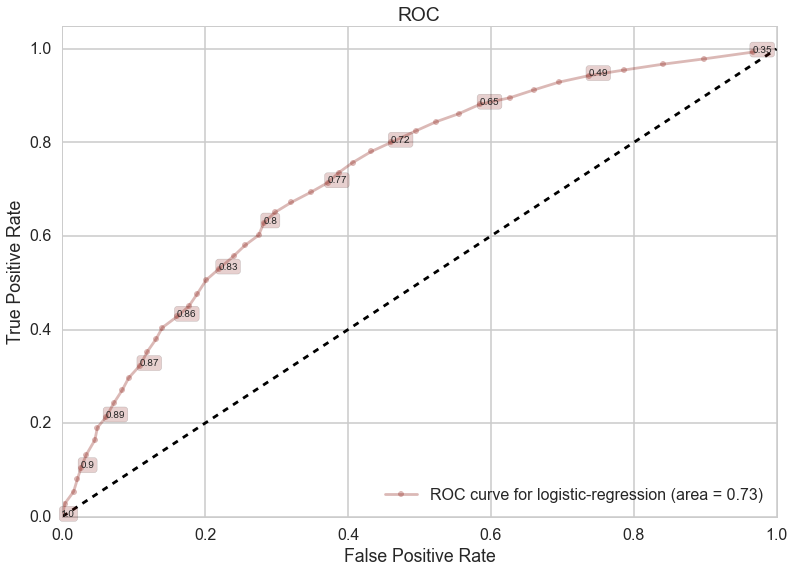

In [31]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-regression",clflog, ytestlr, Xtestlr, labe=200, skip=50)

# kNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier()
k = {}

In [41]:
#coarse grain search
gs = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors": range(1,86,20)}, cv=5)
gs.fit(Xlr, ylr)
gs.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
for scores in gs.grid_scores_:
    k[scores[1]] = (scores[0])['n_neighbors']
k_best = k[max(k.keys())]

In [42]:
#fine grain search
gs = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors": range(k_best-8,k_best+8,2)}, cv=5)
gs.fit(Xlr, ylr)
gs.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
for scores in gs.grid_scores_:
    k[scores[1]] = (scores[0])['n_neighbors']

In [43]:
k

{0.68666666666666665: 1,
 0.76759999999999995: 21,
 0.77573333333333339: 41,
 0.77759999999999996: 61,
 0.77813333333333334: 73,
 0.77839999999999998: 87,
 0.7785333333333333: 77,
 0.77880000000000005: 85,
 0.77906666666666669: 81,
 0.78000000000000003: 83}

In [44]:
k_best = k[max(k.keys())]
k_best

83

In [34]:
#clfknn=KNeighborsClassifier(n_neighbors=k_best)
clfknn=KNeighborsClassifier(n_neighbors=83)
clfknn = clfknn.fit(Xlr, ylr)
train_accuracy = clflog.score(Xlr,ylr)
test_accuracy = clfknn.score(Xtestlr,ytestlr)
print "Accuracy on training data: %0.4f" % (train_accuracy)
print "Accuracy on test data:     %0.4f" % (test_accuracy)

Accuracy on training data: 0.7889
Accuracy on test data:     0.7760


In [35]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [36]:
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

NameError: name 'Xtrain' is not defined

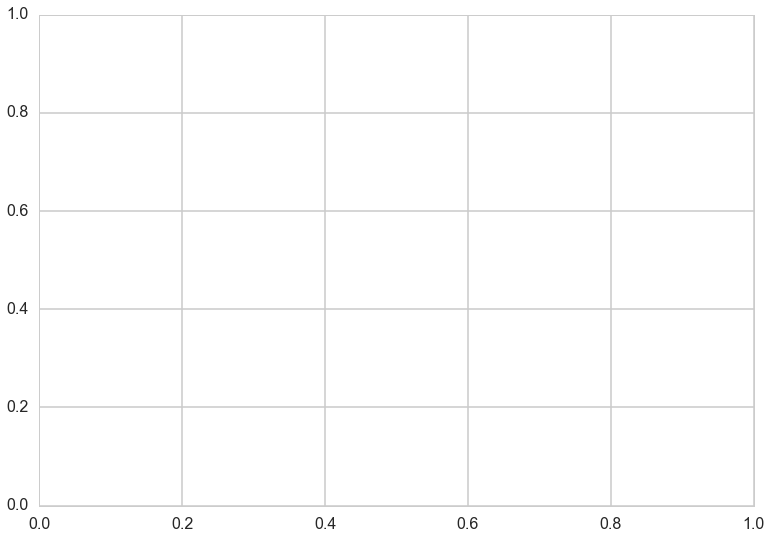

In [37]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)